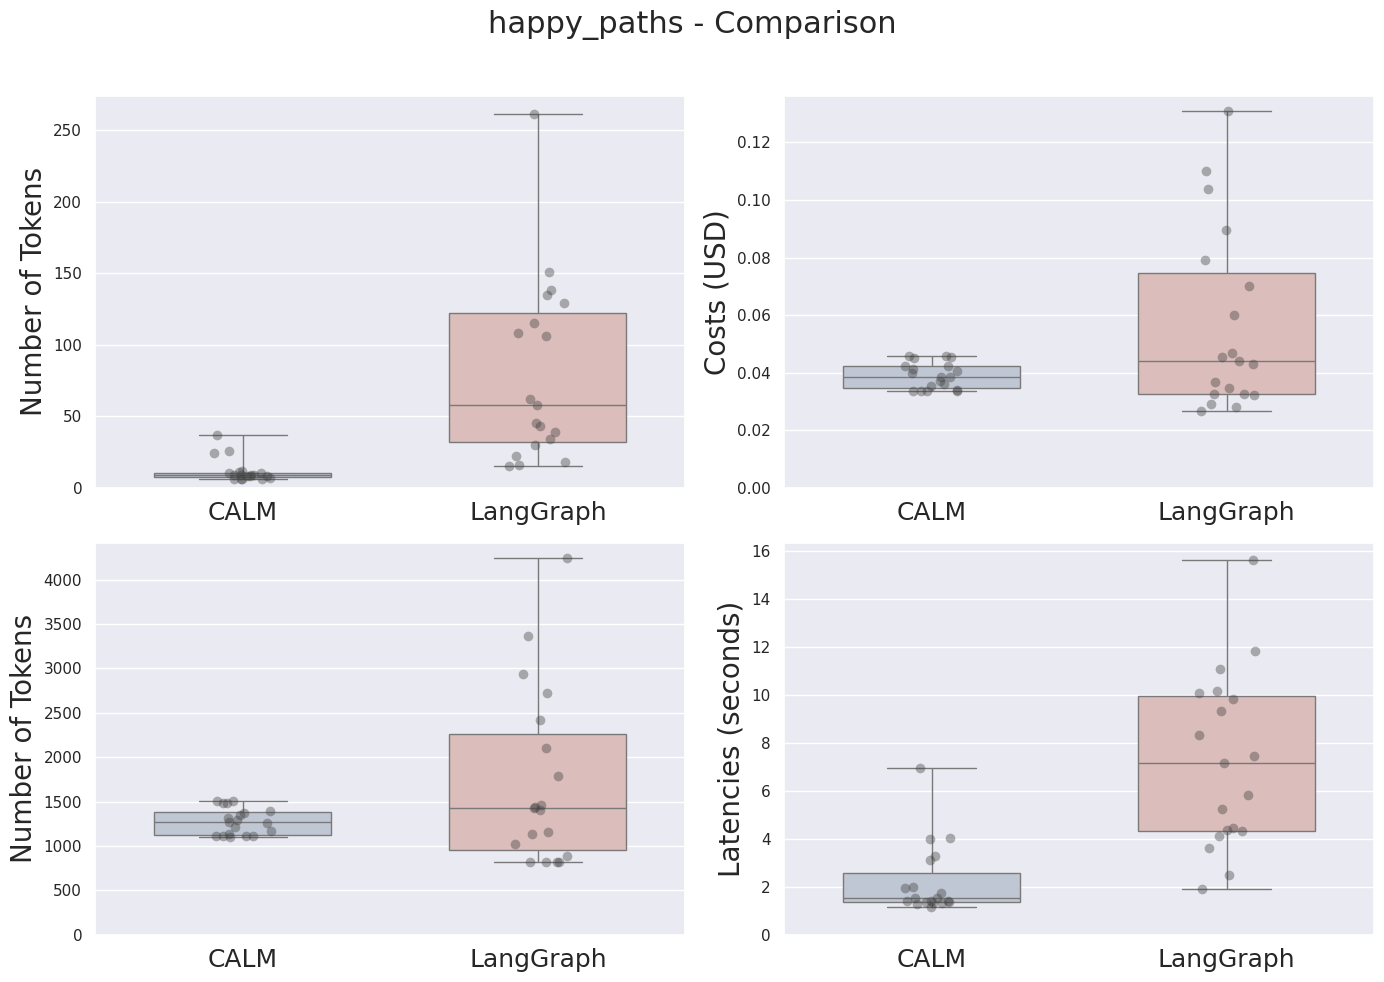

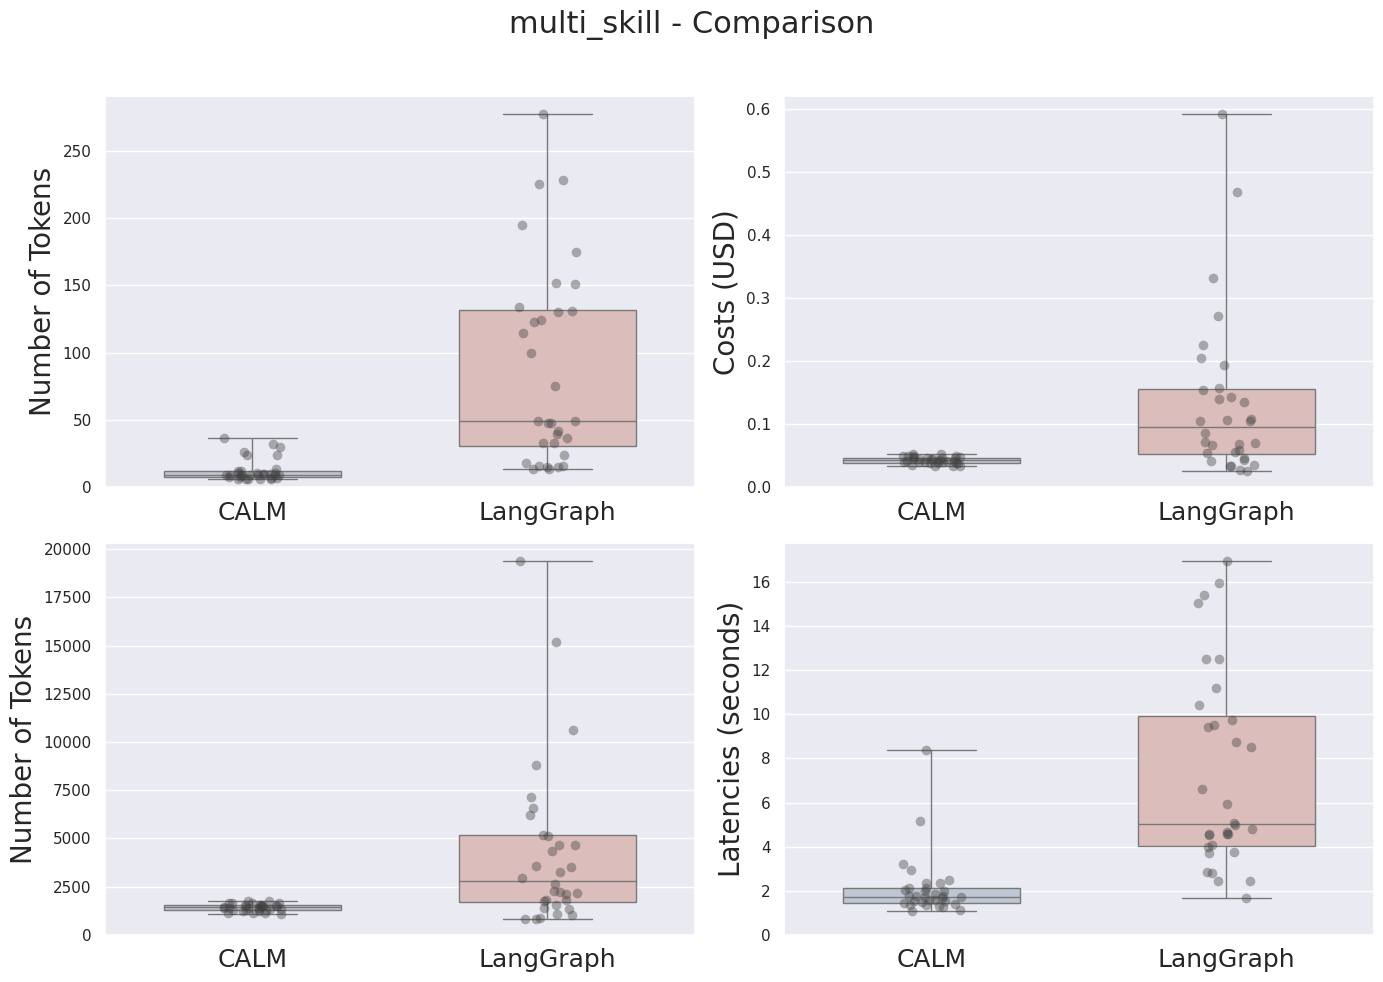

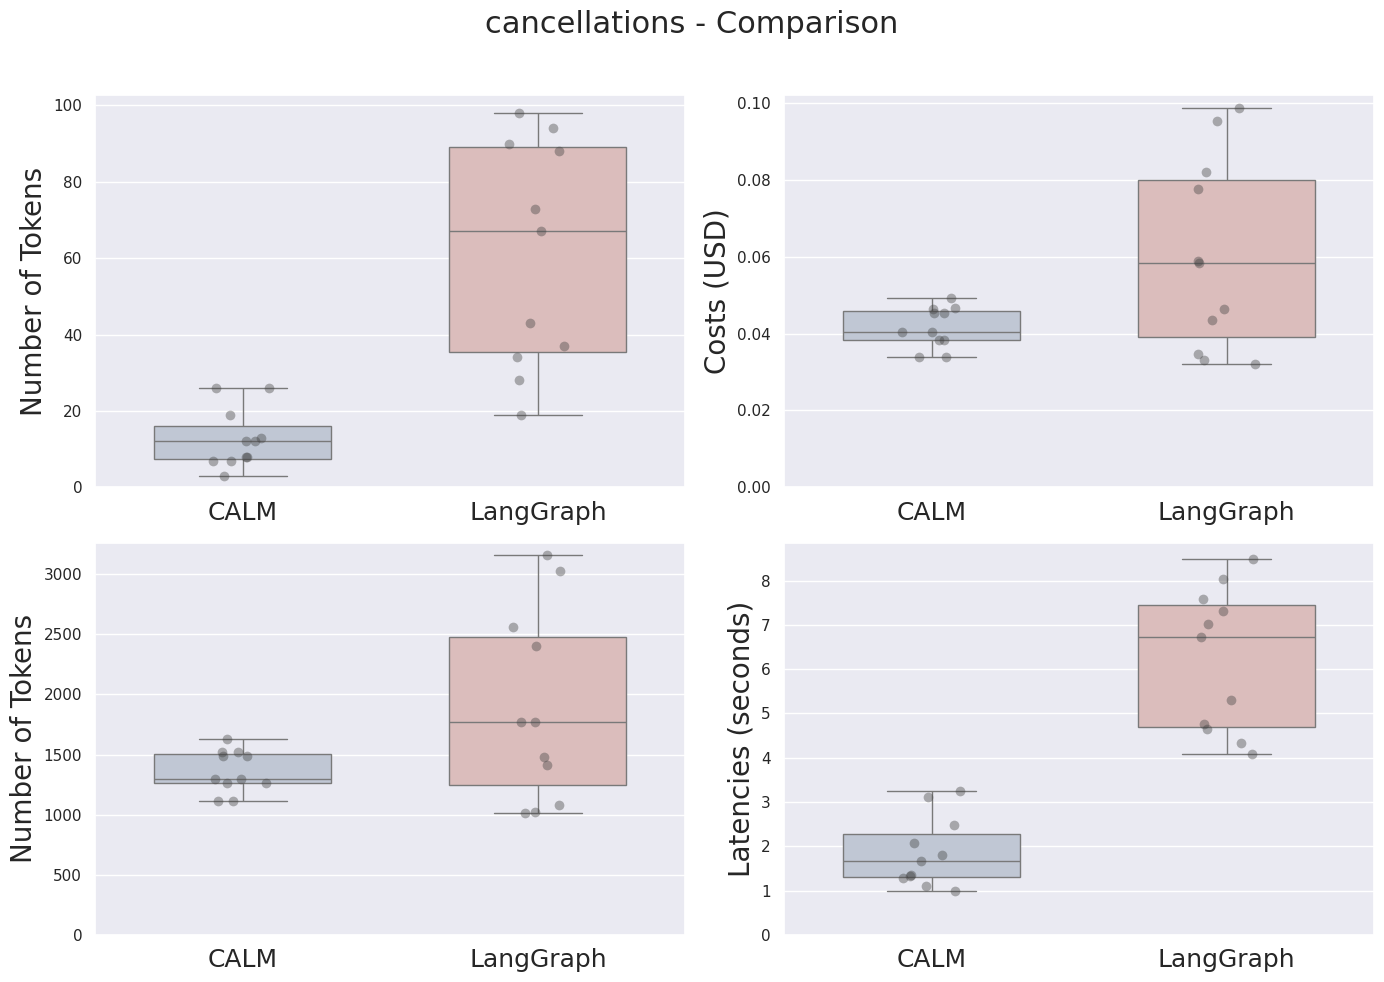

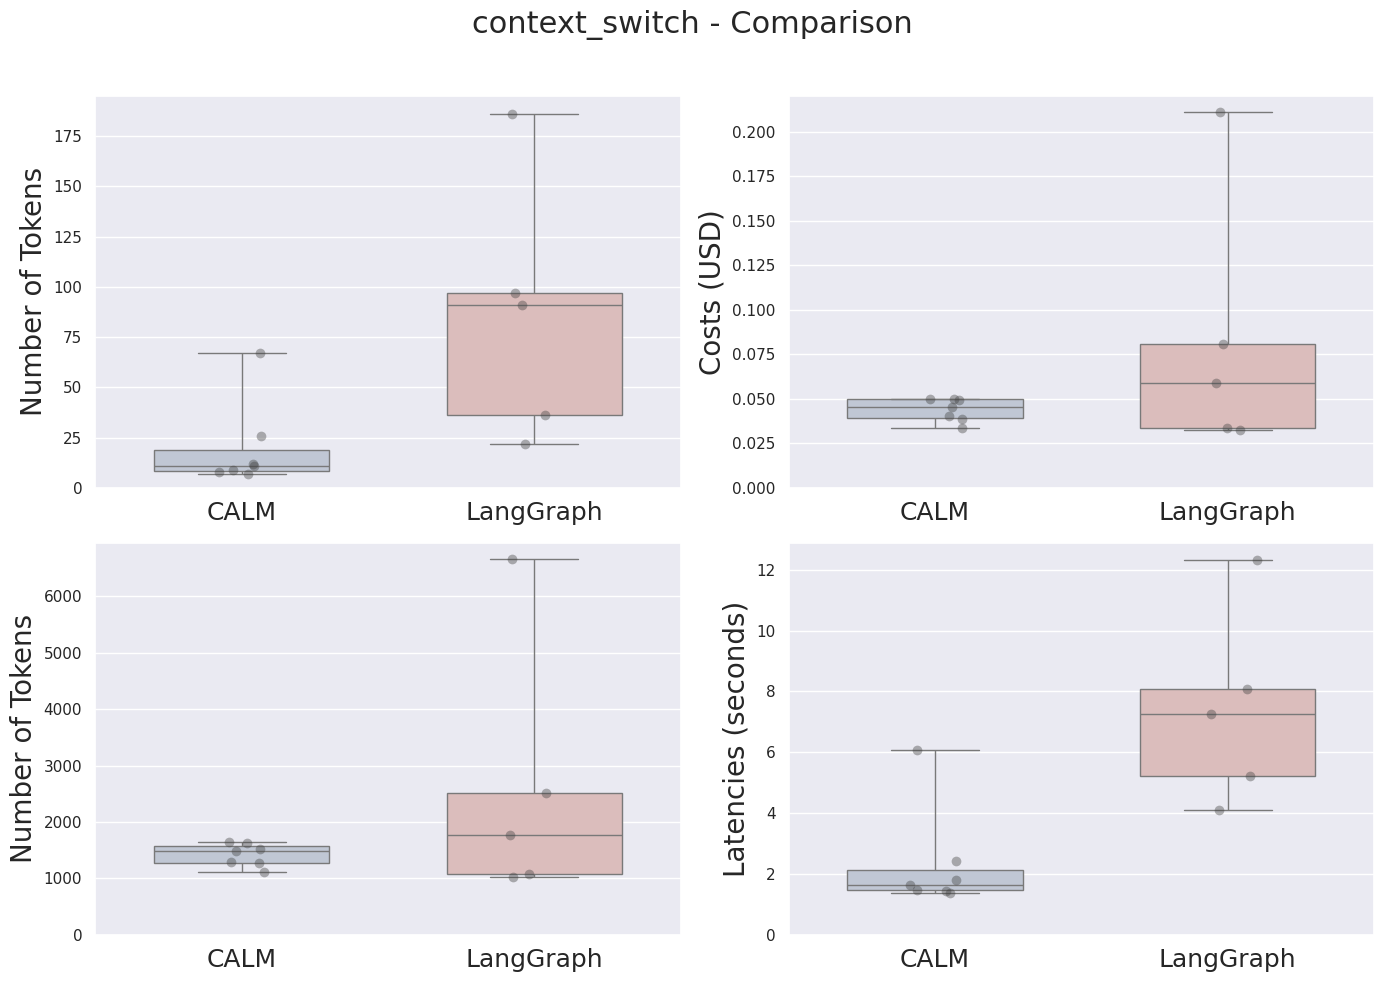

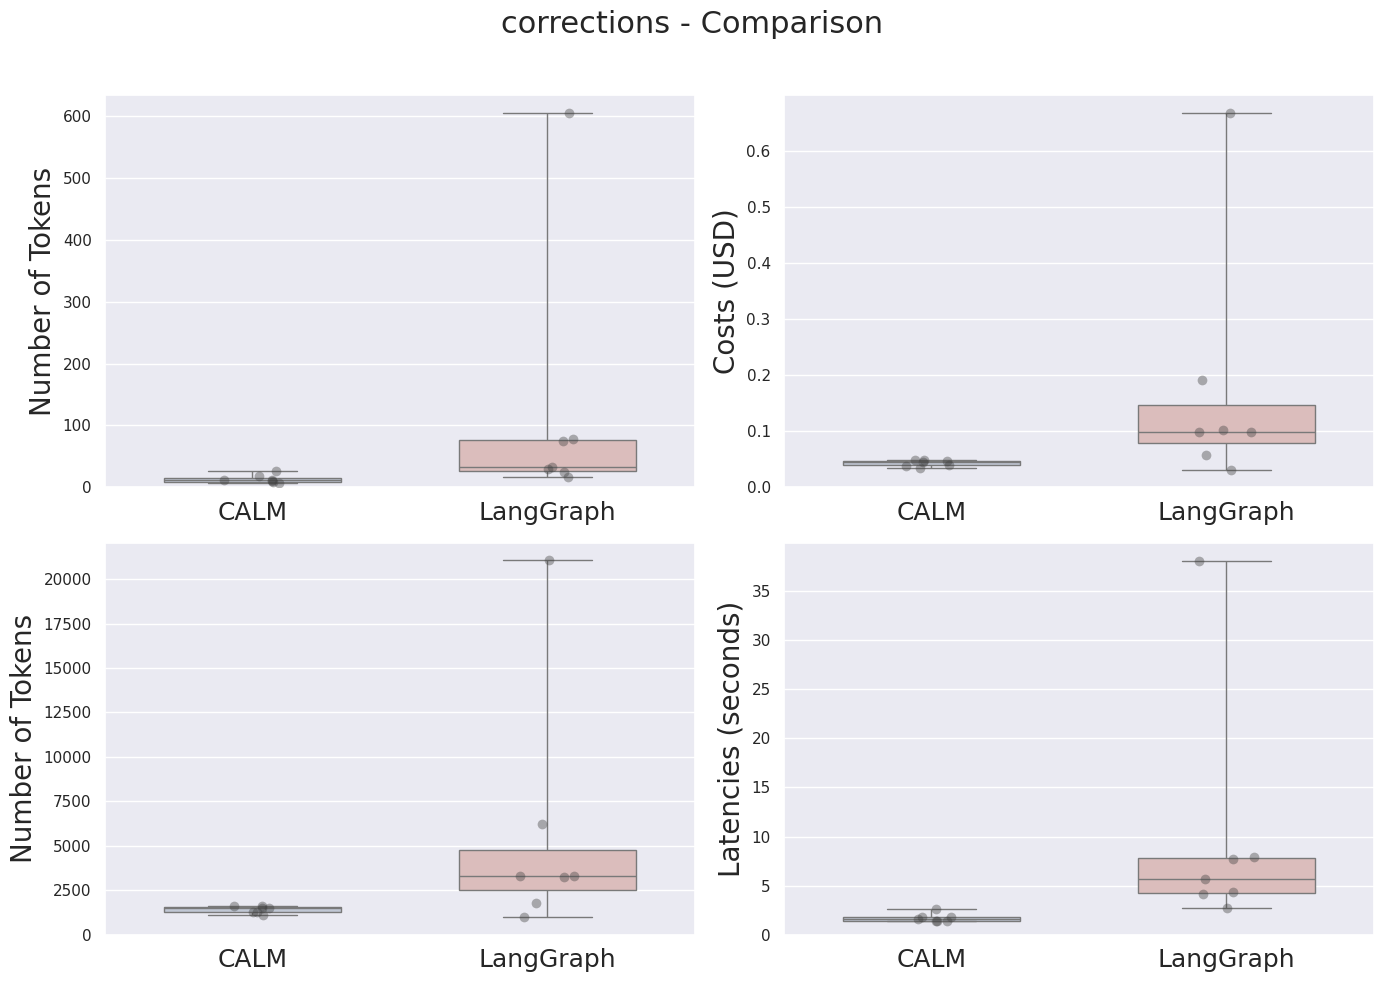

In [1]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Define the directories for the two sets of results
dir1 = "./calm_llm/results/structured_results"  # Rasa/CALM data directory
dir2 = "./langgraph_implementation/results/structured_results"  # LangGraph data directory

# Define the output directory for figures
output_dir = "./figures"
os.makedirs(output_dir, exist_ok=True)

# Identify datasets dynamically from the directory structure
datasets = [d for d in os.listdir(dir1) if os.path.isdir(os.path.join(dir1, d))]

# Define a mapping for metric names to standardize comparison
metric_name_mapping_set1 = {
    'completion_tokens': 'completion_tokens',  # Rasa/CALM uses completion_tokens
    'costs': 'costs',
    'input_tokens': 'input_tokens',
    'latencies': 'latencies'
}

metric_name_mapping_set2 = {
    'completion_tokens': 'output_tokens',  # LangGraph uses output_tokens
    'costs': 'costs',
    'input_tokens': 'input_tokens',
    'latencies': 'latencies'
}

# Load data from both directories for comparison
data = {'set1': {}, 'set2': {}}
for dataset in datasets:
    data['set1'][dataset] = {}
    data['set2'][dataset] = {}
    for metric in metric_name_mapping_set1.keys():
        # Standardized metric names
        metric_standardized = metric_name_mapping_set1[metric]
        
        # File paths
        metric_file1 = os.path.join(dir1, dataset, f"{metric}.json")
        metric_file2 = os.path.join(dir2, dataset, f"{metric_name_mapping_set2[metric]}.json")
        
        # Load data for set1
        if os.path.exists(metric_file1):
            with open(metric_file1, 'r') as f:
                data['set1'][dataset][metric_standardized] = json.load(f)
        else:
            data['set1'][dataset][metric_standardized] = []

        # Load data for set2
        if os.path.exists(metric_file2):
            with open(metric_file2, 'r') as f:
                data['set2'][dataset][metric_standardized] = json.load(f)
        else:
            data['set2'][dataset][metric_standardized] = []

# Plotting the data using box plots with strip plots overlayed for all datasets and metrics
for dataset in datasets:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'{dataset} - Comparison', fontsize=22)
    axes = axes.flatten()

    for i, metric in enumerate(metric_name_mapping_set1.keys()):
        if i >= 4:
            print(f"Warning: More than 4 metrics detected. Only the first 4 will be plotted for {dataset}.")
            break

        metric_standardized = metric_name_mapping_set1[metric]
        data_set1 = data['set1'][dataset].get(metric_standardized, [])
        data_set2 = data['set2'][dataset].get(metric_standardized, [])

        # Check for empty data sets
        if not data_set1 and not data_set2:
            print(f"No data available for {dataset} - {metric_standardized}. Skipping plot.")
            continue

        # Create box plot and strip plot
        sns.boxplot(data=[data_set1, data_set2], whis=[0, 100], width=0.6, palette="vlag", ax=axes[i])
        sns.stripplot(data=[data_set1, data_set2], size=7, color=".25", alpha=0.4, jitter=True, ax=axes[i])

        # Set y-axis label with units
        if metric_standardized == 'costs':
            axes[i].set_ylabel('Costs (USD)', fontsize=20)
        elif metric_standardized == 'latencies':
            axes[i].set_ylabel('Latencies (seconds)', fontsize=20)
        elif metric_standardized in ['completion_tokens', 'input_tokens']:
            axes[i].set_ylabel('Number of Tokens', fontsize=20)
        else:
            axes[i].set_ylabel(metric_standardized.capitalize().replace('_', ' '), fontsize=20)

        axes[i].set_xlabel('')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['CALM', 'LangGraph'], fontsize=18)

        # Set the Y-axis to start at zero
        axes[i].set_ylim(bottom=0)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title

    # Save the figure to the output directory
    fig.savefig(os.path.join(output_dir, f"{dataset}_comparison.png"))

    # Show the plot
    plt.show()

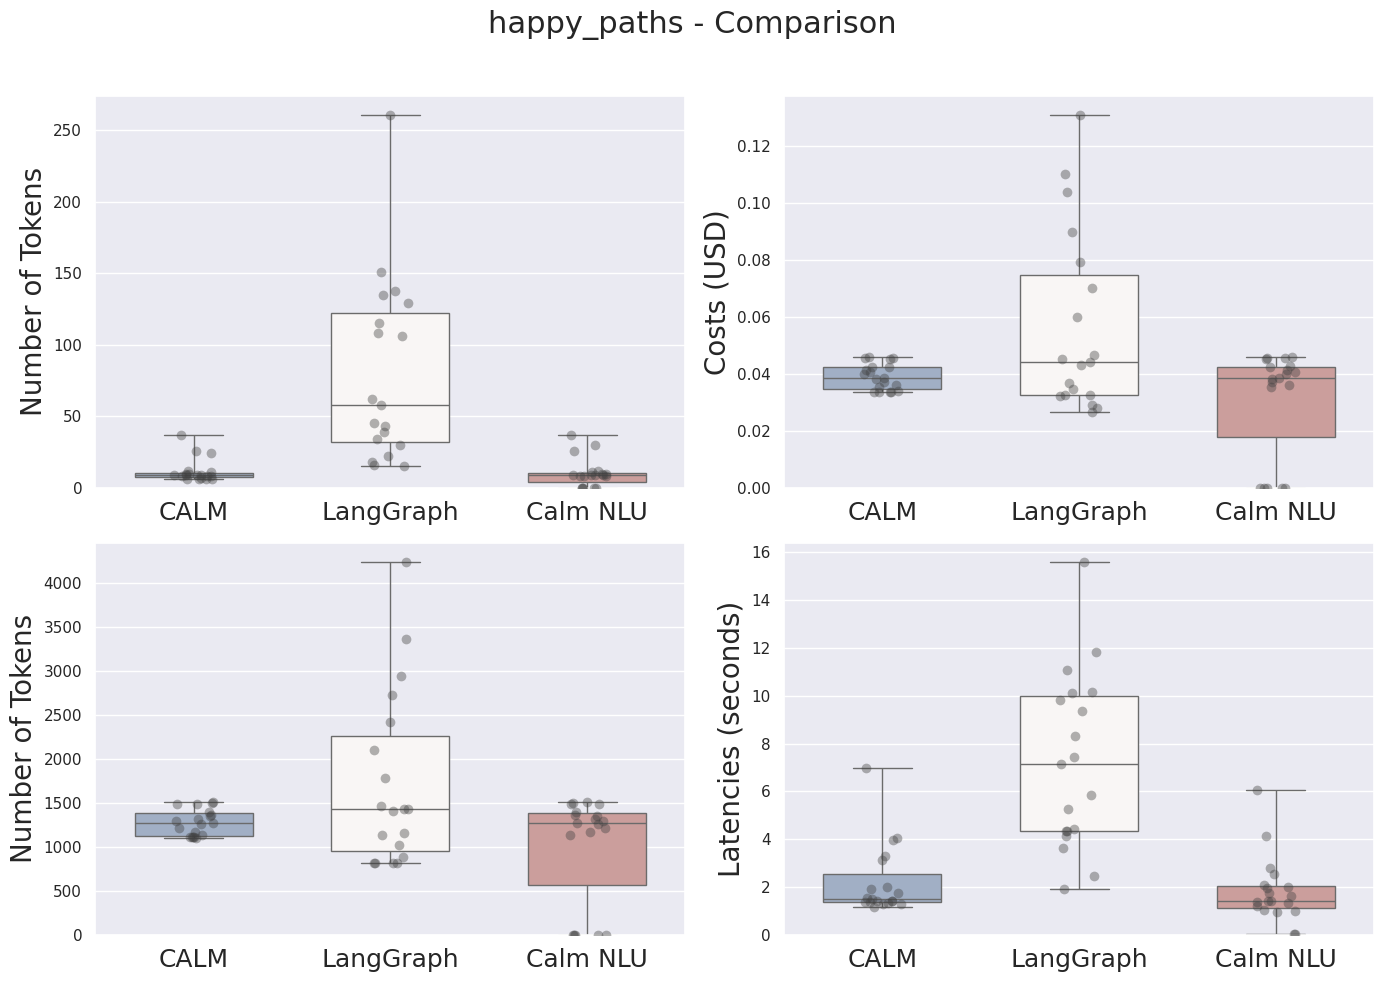

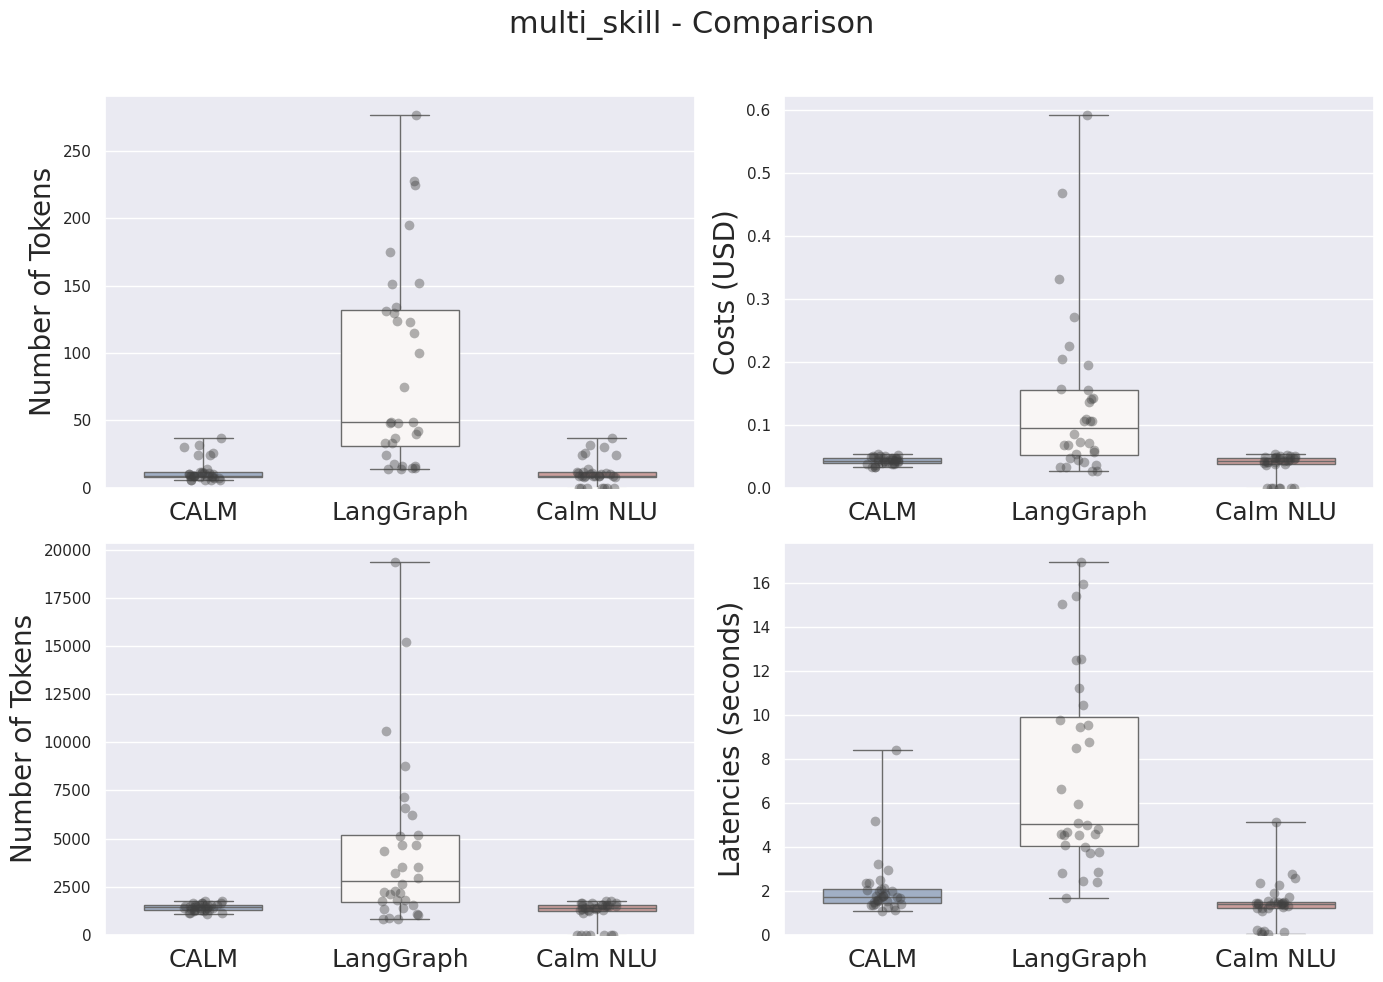

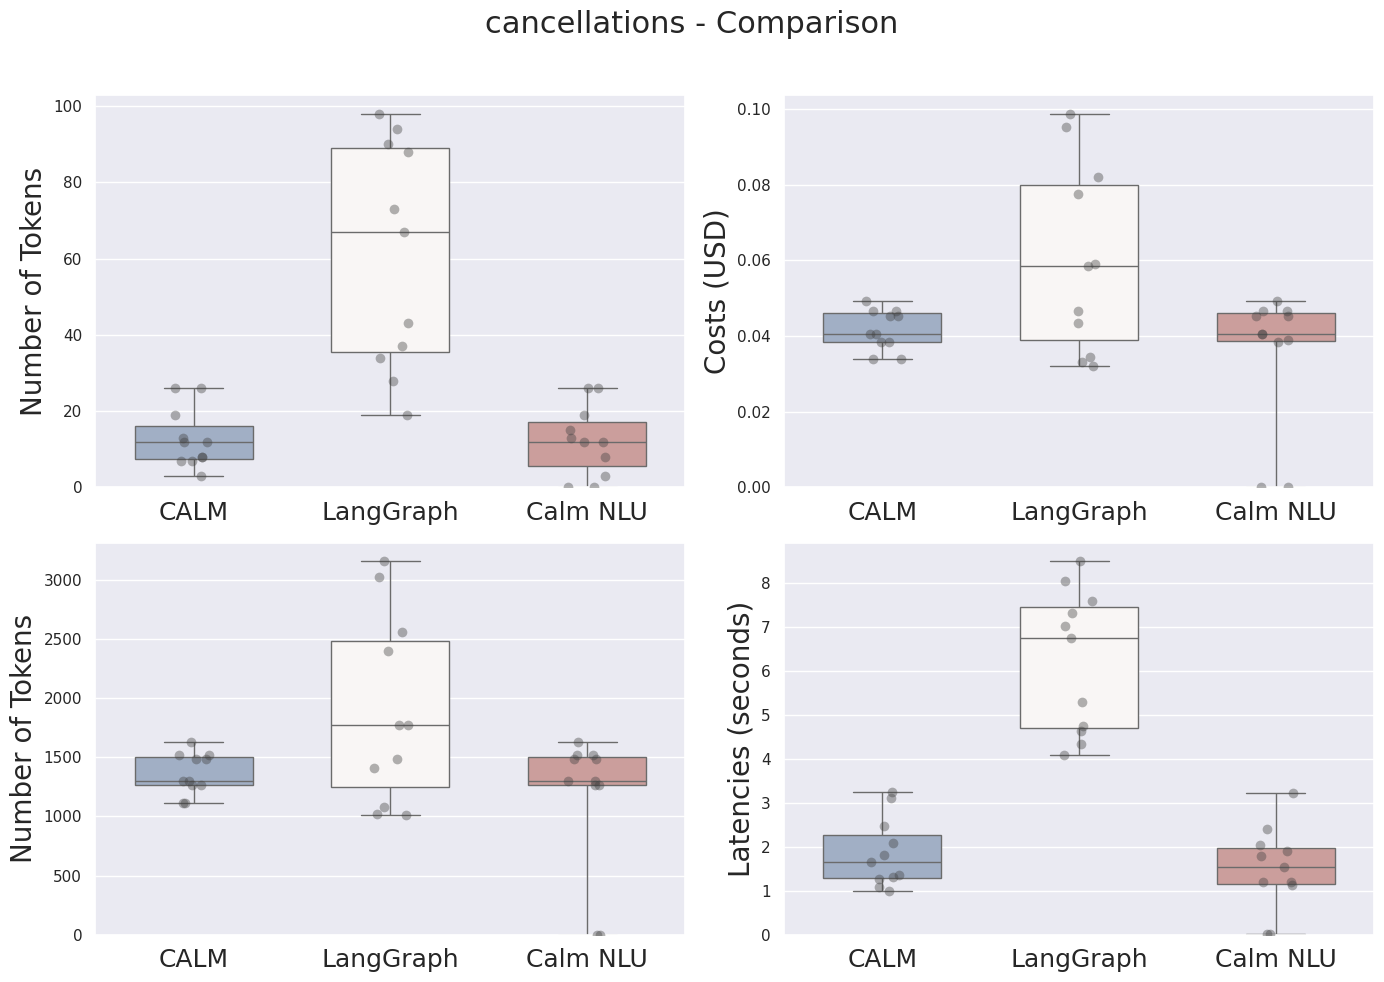

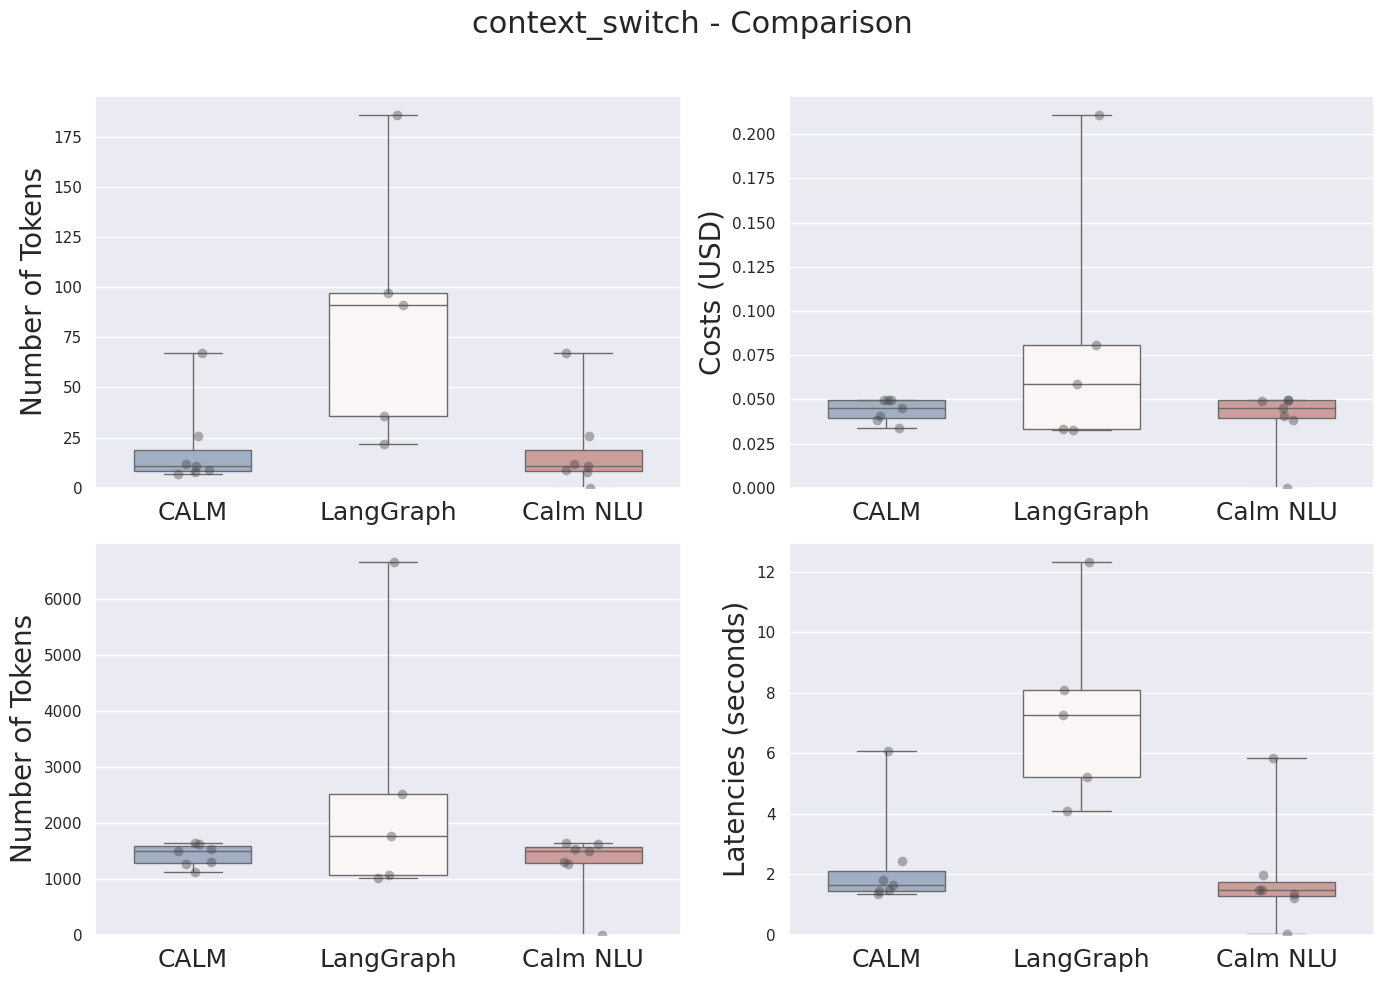

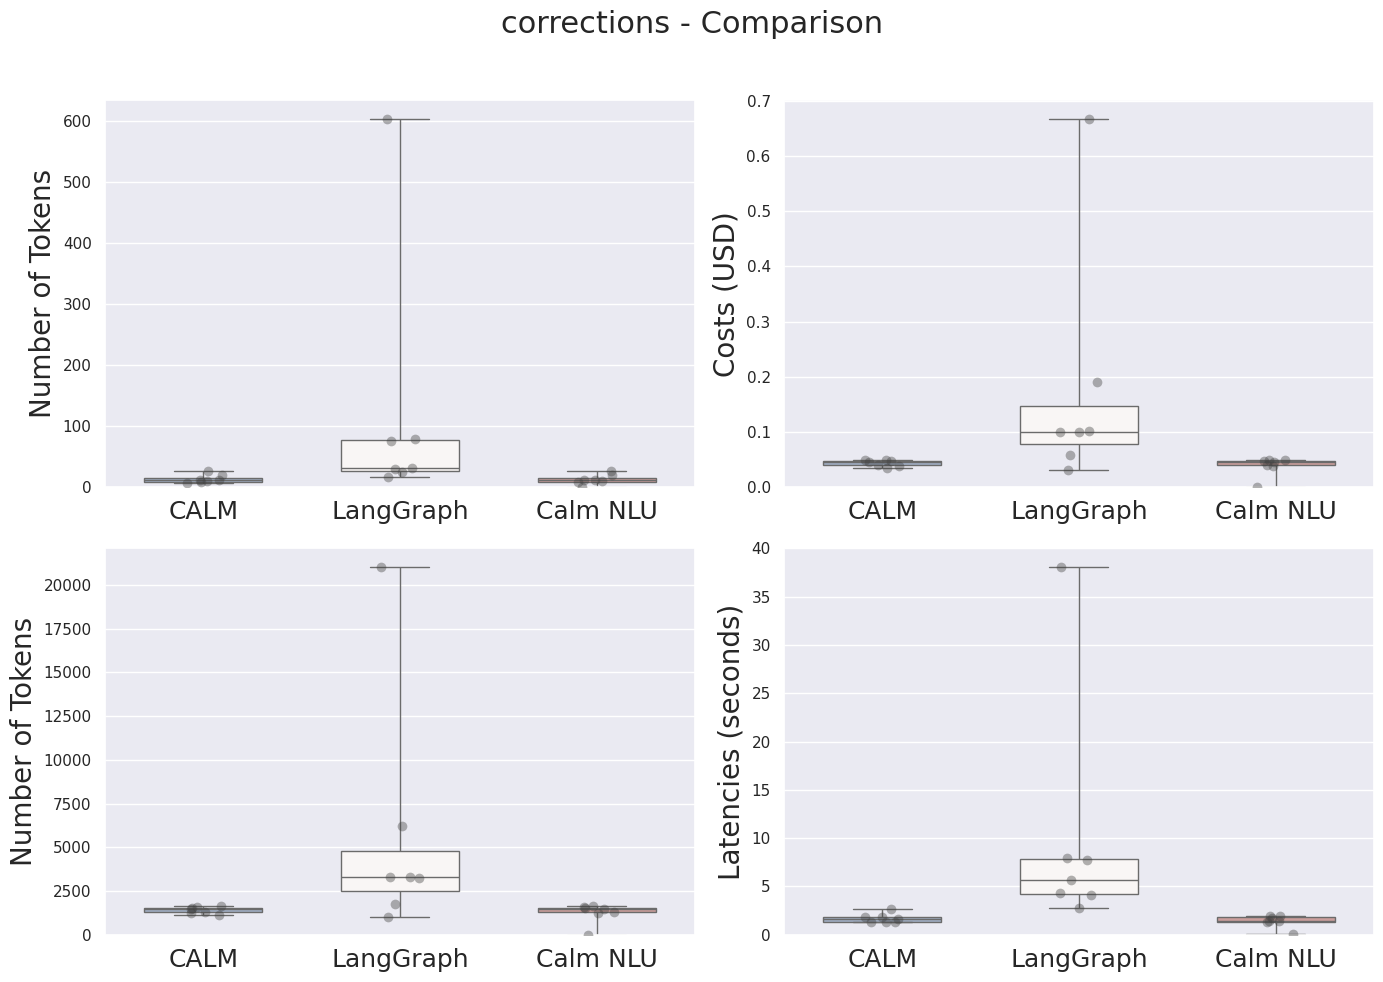

In [2]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Define the directories for the three sets of results
dir1 = "./calm_llm/results/structured_results"  # Rasa/CALM data directory
dir2 = "./langgraph_implementation/results/structured_results"  # LangGraph data directory
dir3 = "./calm_nlu/results/structured_results"  # Calm NLU data directory

# Define the output directory for figures
output_dir = "./figures"
os.makedirs(output_dir, exist_ok=True)

# Identify datasets dynamically from the directory structure
datasets = [d for d in os.listdir(dir1) if os.path.isdir(os.path.join(dir1, d))]

# Define a mapping for metric names to standardize comparison
metric_name_mapping_set1 = {
    'completion_tokens': 'completion_tokens',  # Rasa/CALM uses completion_tokens
    'costs': 'costs',
    'input_tokens': 'input_tokens',
    'latencies': 'latencies'
}

metric_name_mapping_set2 = {
    'completion_tokens': 'output_tokens',  # LangGraph uses output_tokens
    'costs': 'costs',
    'input_tokens': 'input_tokens',
    'latencies': 'latencies'
}

metric_name_mapping_set3 = {
    'completion_tokens': 'completion_tokens',  # Calm NLU uses completion_tokens
    'costs': 'costs',
    'input_tokens': 'input_tokens',
    'latencies': 'latencies'
}

# Load data from all three directories for comparison
data = {'set1': {}, 'set2': {}, 'set3': {}}
for dataset in datasets:
    data['set1'][dataset] = {}
    data['set2'][dataset] = {}
    data['set3'][dataset] = {}
    for metric in metric_name_mapping_set1.keys():
        # Standardized metric names
        metric_standardized = metric_name_mapping_set1[metric]
        
        # File paths
        metric_file1 = os.path.join(dir1, dataset, f"{metric}.json")
        metric_file2 = os.path.join(dir2, dataset, f"{metric_name_mapping_set2[metric]}.json")
        metric_file3 = os.path.join(dir3, dataset, f"{metric}.json")  # Calm NLU follows the same naming as set1
        
        # Load data for set1
        if os.path.exists(metric_file1):
            with open(metric_file1, 'r') as f:
                data['set1'][dataset][metric_standardized] = json.load(f)
        else:
            data['set1'][dataset][metric_standardized] = []

        # Load data for set2
        if os.path.exists(metric_file2):
            with open(metric_file2, 'r') as f:
                data['set2'][dataset][metric_standardized] = json.load(f)
        else:
            data['set2'][dataset][metric_standardized] = []

        # Load data for set3
        if os.path.exists(metric_file3):
            with open(metric_file3, 'r') as f:
                data['set3'][dataset][metric_standardized] = json.load(f)
        else:
            data['set3'][dataset][metric_standardized] = []

# Plotting the data using box plots with strip plots overlayed for all datasets and metrics
for dataset in datasets:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'{dataset} - Comparison', fontsize=22)
    axes = axes.flatten()

    for i, metric in enumerate(metric_name_mapping_set1.keys()):
        if i >= 4:
            print(f"Warning: More than 4 metrics detected. Only the first 4 will be plotted for {dataset}.")
            break

        metric_standardized = metric_name_mapping_set1[metric]
        data_set1 = data['set1'][dataset].get(metric_standardized, [])
        data_set2 = data['set2'][dataset].get(metric_standardized, [])
        data_set3 = data['set3'][dataset].get(metric_standardized, [])

        # Check for empty data sets
        if not data_set1 and not data_set2 and not data_set3:
            print(f"No data available for {dataset} - {metric_standardized}. Skipping plot.")
            continue

        # Create box plot and strip plot
        sns.boxplot(data=[data_set1, data_set2, data_set3], whis=[0, 100], width=0.6, palette="vlag", ax=axes[i])
        sns.stripplot(data=[data_set1, data_set2, data_set3], size=7, color=".25", alpha=0.4, jitter=True, ax=axes[i])

        # Set y-axis label with units
        if metric_standardized == 'costs':
            axes[i].set_ylabel('Costs (USD)', fontsize=20)
        elif metric_standardized == 'latencies':
            axes[i].set_ylabel('Latencies (seconds)', fontsize=20)
        elif metric_standardized in ['completion_tokens', 'input_tokens']:
            axes[i].set_ylabel('Number of Tokens', fontsize=20)
        else:
            axes[i].set_ylabel(metric_standardized.capitalize().replace('_', ' '), fontsize=20)

        axes[i].set_xlabel('')
        axes[i].set_xticks([0, 1, 2])
        axes[i].set_xticklabels(['CALM', 'LangGraph', 'Calm NLU'], fontsize=18)

        # Set the Y-axis to start at zero
        axes[i].set_ylim(bottom=0)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title

    # Save the figure to the output directory
    fig.savefig(os.path.join(output_dir, f"{dataset}_comparison.png"))

    # Show the plot
    plt.show()

In [3]:
import statistics

def aggregate_metrics(data):
    aggregated_data = {'set1': {}, 'set2': {}, 'set3': {}}
    for set_name, categories in data.items():
        for category, metrics in categories.items():
            for metric, values in metrics.items():
                if metric not in aggregated_data[set_name]:
                    aggregated_data[set_name][metric] = []
                aggregated_data[set_name][metric].extend(values)
    return aggregated_data

def calculate_statistics(aggregated_data):
    results = {}
    for set_name, metrics in aggregated_data.items():
        results[set_name] = {}
        for metric, values in metrics.items():
            if values:
                mean_value = statistics.mean(values)
                median_value = statistics.median(values)
            else:
                mean_value = None
                median_value = None
            results[set_name][metric] = {
                'mean': mean_value,
                'median': median_value
            }
    return results

def print_comparison_table(statistics_results):
    print(f"{'Metric':<20} {'Calm Mean':<10} {'LG Mean':<10} {'Calm NLU Mean':<10} {'Calm Median':<10} {'LG Median':<10} {'Calm NLU Median':<10}")
    print("="*90)
    metrics = statistics_results['set1'].keys()
    for metric in metrics:
        calm_mean = statistics_results['set1'][metric]['mean']
        lg_mean = statistics_results['set2'][metric]['mean']
        calmnlu_mean = statistics_results['set3'][metric]['mean']
        calm_median = statistics_results['set1'][metric]['median']
        lg_median = statistics_results['set2'][metric]['median']
        calmnlu_median = statistics_results['set3'][metric]['median']
        print(f"{metric:<20} {calm_mean:<10.2f} {lg_mean:<10.2f} {calmnlu_mean:<10.2f} {calm_median:<10.2f} {lg_median:<10.2f} {calmnlu_median:<10.2f}")
    print("\n")

# Assuming 'data' is already defined with the structure you provided
aggregated_data = aggregate_metrics(data)
statistics_results = calculate_statistics(aggregated_data)

# Print comparison table for aggregated metrics
print_comparison_table(statistics_results)

Metric               Calm Mean  LG Mean    Calm NLU Mean Calm Median LG Median  Calm NLU Median
completion_tokens    13.18      85.58      12.00      9.00       53.50      9.50      
costs                0.04       0.10       0.03       0.04       0.07       0.04      
input_tokens         1377.91    3287.38    1131.33    1367.00    2120.00    1352.00   
latencies            2.08       7.40       1.58       1.67       5.89       1.43      


